In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import numpy as np

Import csv files as dataframes

In [2]:
pdx_by_date = pd.read_csv('../data/By_Date/pdx_by_date.csv')
metro_by_date = pd.read_csv('../data/By_Date/metro_by_date.csv')
divvy_by_date = pd.read_csv('../data/By_Date/divvy_by_date.csv')
citi_by_date = pd.read_csv('../data/By_Date/citi_by_date.csv')
jc_citi_by_date = pd.read_csv('../data/By_Date/jc_citi_by_date.csv')
capital_by_date = pd.read_csv('../data/By_Date/capital_by_date.csv')
bay_by_date = pd.read_csv('../data/By_Date/bay_by_date.csv')
niceride_by_date = pd.read_csv('../data/By_Date/niceride_by_date.csv')
bluebike_by_date = pd.read_csv('../data/By_Date/bluebike_by_date.csv')

correct LA's "ride_date" column

In [3]:
metro_by_date.rename(columns={'start_date':'ride_date'}, inplace=True)

Plot total ride counts by city

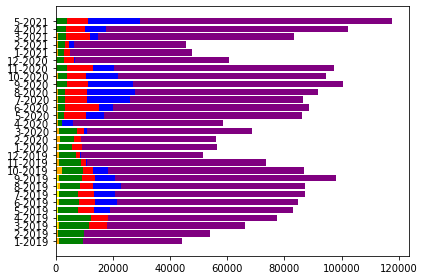

In [4]:
fig = figsize=(50,50)

plt.barh('m_y', 'ride_count', data=citi_by_date, color='purple')
plt.tight_layout()

plt.barh('m_y', 'ride_count', data=divvy_by_date, color='blue')
plt.tight_layout()

plt.barh('m_y', 'ride_count', data=capital_by_date, color='red')
plt.tight_layout()

plt.barh('m_y', 'ride_count', data=bay_by_date, color = 'green')
plt.tight_layout()

plt.barh('m_y', 'ride_count', data=metro_by_date, color='orange')
plt.tight_layout()

plt.barh('m_y', 'ride_count', data=pdx_by_date, color='yellow')
plt.tight_layout()


# legend.show()

Insert "City Column" in each DF

In [5]:
pdx_by_date['city'] = 'Portland'
metro_by_date['city'] = 'Los Angeles'
divvy_by_date['city'] = 'Chicago'
citi_by_date['city'] = 'New York City'
jc_citi_by_date['city'] = 'New York City'
capital_by_date['city'] = 'Washington DC'
bay_by_date['city'] = 'San Francisco'
bluebike_by_date['city'] = 'Boston'
niceride_by_date['city'] = 'Minneapolis'

Concatenate All DataFrames into what will be exported into Power BI

In [6]:
all_cities = pd.concat([pdx_by_date, bay_by_date, divvy_by_date, metro_by_date, citi_by_date, capital_by_date, jc_citi_by_date, bluebike_by_date, niceride_by_date])

Drop Unnecessary Columns

In [7]:
all_cities2 = all_cities

In [8]:
all_cities = all_cities.drop(['Unnamed: 0', 'month', 'year', 'm_y'], axis=1)

In [9]:
all_cities2 = all_cities2.drop(['Unnamed: 0', 'month', 'year'], axis=1)

Save as CSV

In [10]:
all_cities.to_csv('all_cities.csv')

In [11]:
all_cities2[all_cities2['city'] == 'New York City']

,ride_date,ride_count,m_y,city,mm-dd
0,2019-01-01,21778,1-2019,New York City,NaN
1,2019-01-02,37670,1-2019,New York City,NaN
2,2019-01-03,41544,1-2019,New York City,NaN
3,2019-01-04,43776,1-2019,New York City,NaN
4,2019-01-05,17356,1-2019,New York City,NaN
...,...,...,...,...,...
876,2021-05-27,2215,5-2021,New York City,NaN
877,2021-05-28,1187,5-2021,New York City,NaN
878,2021-05-29,560,5-2021,New York City,NaN
879,2021-05-30,267,5-2021,New York City,NaN


In [12]:
all_cities2.groupby(['m_y', 'city']).agg({'ride_count':'sum'})

ride_count
m_y    city                     
1-2019 Boston              69548
       Chicago            102919
       Los Angeles         19208
       New York City      983137
       Portland             5942
...                          ...
9-2020 Los Angeles         11101
       Minneapolis         18533
       New York City     2506643
       San Francisco       75711
       Washington DC      215567

[207 rows x 1 columns]

In [13]:
all_cities.groupby(['city']).agg({'ride_count':'sum'})

,ride_count
city,
Boston,5298471
Chicago,8180238
Los Angeles,525844
Minneapolis,368319
New York City,48610857
Portland,168583
San Francisco,3679115
Washington DC,6053241


In [14]:
# citi_by_date[(citi_by_date['year'] == 2019) & (citi_by_date['month'] == 1)].head()

In [15]:
# ny = all_cities2[all_cities2['city'] == 'New York City']

In [16]:
# ny.groupby('m_y').agg({'ride_count':'sum'})

In [17]:
all_cities0 = all_cities.drop(['mm-dd'], axis=1)

In [18]:
# all_cities0['ride_date'] = pd.to_datetime(all_cities['ride_date'], format='%Y-%m-%d')

In [19]:
# all_cities0['ride_date'] = pd.to_datetime(all_cities0['ride_date'])
# all_cities0['ride_date'] = all_cities0['ride_date'].dt.normalize()

Recreate Manageable Datasets

In [20]:
chicago = all_cities0[all_cities0['city'] == 'Chicago']
sf = all_cities0[all_cities0['city'] == 'San Francisco']
nyc = all_cities0[all_cities0['city'] == 'New York City']
portland = all_cities0[all_cities0['city'] == 'Portland']
la = all_cities0[all_cities0['city'] == 'Los Angeles']
dc = all_cities0[all_cities0['city'] == 'Washington DC']
minneapolis = all_cities0[all_cities0['city'] == 'Minneapolis']
boston = all_cities0[all_cities0['city'] == 'Boston']

In [21]:
nyc.tail()

,ride_date,ride_count,city
876,2021-05-27,2215,New York City
877,2021-05-28,1187,New York City
878,2021-05-29,560,New York City
879,2021-05-30,267,New York City
880,2021-05-31,2117,New York City


Set Dates to Use in Timeline

In [22]:
chicago_covid = chicago[chicago['ride_date'].between('2020-01-01', '2020-06-30', inclusive=True)]
sf_covid = sf[sf['ride_date'].between('2020-01-01', '2020-06-30', inclusive=True)]
nyc_covid = nyc[nyc['ride_date'].between('2020-01-01', '2020-06-30', inclusive=True)]
portland_covid = portland[portland['ride_date'].between('2020-01-01', '2020-06-30', inclusive=True)]
la_covid = la[la['ride_date'].between('2020-01-01', '2020-06-30', inclusive=True)]
dc_covid = dc[dc['ride_date'].between('2020-01-01', '2020-06-30', inclusive=True)]
minneapolis_covid = minneapolis[minneapolis['ride_date'].between('2020-01-01', '2020-06-30', inclusive=True)]
boston_covid = boston[boston['ride_date'].between('2020-01-01', '2020-06-30', inclusive=True)]

In [23]:
chicago_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 365 to 544
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ride_date   180 non-null    object
 1   ride_count  180 non-null    int64 
 2   city        180 non-null    object
dtypes: int64(1), object(2)
memory usage: 5.6+ KB


#### Create Working Timelines

Chicago:

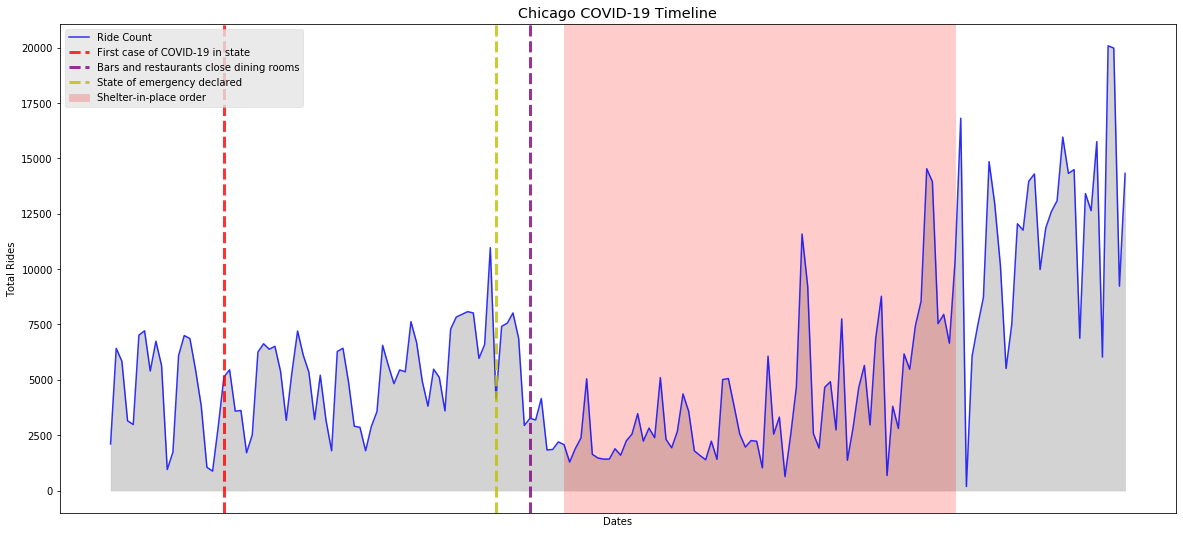

In [24]:
fig, ax1 = plt.subplots(figsize=(20,9)) # setting size of graph area

plt.style.use('ggplot')


# area graph to show number cases
ax1.fill_between(chicago_covid['ride_date'], chicago_covid['ride_count'], color="darkgray", alpha=0.5)

# line to highlight area graph
ax1.plot(chicago_covid['ride_date'], chicago_covid['ride_count'], color="blue", alpha=0.8, label = 'Ride Count') 

##TEST
# plt.plot_date(chicago_covid['ride_date'], chicago_covid['ride_count'], xdate=True,ydate=False) 

# COVID-19 Happenings
ax1.axvspan('2020-03-21', '2020-05-29', alpha=0.2, color='red', label= 'Shelter-in-place order')
ax1.axvline(x = '2020-01-21', lw = 3, color = 'red', ls = '--', alpha = 0.8,label= 'First case of COVID-19 in state')
ax1.axvline(x = '2020-03-15', lw = 3, color = 'purple', ls = '--', alpha = 0.8,label= 'Bars and restaurants close dining rooms')
ax1.axvline(x = '2020-03-09', lw = 3, color = 'y', ls = '--', alpha = 0.8,label= 'State of emergency declared')
# ax1.axvline(x = '2020-07-13', lw = 3, color = 'darkgreen', ls = ':', alpha = 0.8,label= '')
# ax1.axvline(x = '2020-10-01', lw = 3, color = 'tab:orange', ls = '--', alpha = 0.8,label= '')
# ax1.axvline(x = '2020-12-12', lw = 3, color = 'tab:olive', ls = 'dashdot', alpha = 0.8,label= '')


# formatting x axis date to show month and year
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b - %y'))

# Add titles
plt.title("Chicago COVID-19 Timeline")
ax1.set_xlabel("Dates")
ax1.set_ylabel('Total Rides')
ax1.legend()

# plt.savefig('../assets/covid_gov_mandates.png')
# ;

In [25]:
# # ax1 = plt.plot('ride_date', 'ride_count', data=chicago_covid)

# # ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# # ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b - %y'))

# fig = plt.figure(figsize=(12, 10), dpi=80)
# ax1 = fig.add_subplot(111)

# # ax1.axvline(x = '2020-03-21', lw = 3, color = 'red', ls = '--', alpha = 0.8,label= 'Shelter-in-place order begins')


# # lines = ax1.plot(chicago_covid['ride_date'], chicago_covid['ride_count'], label='Open values')
# # ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))



# ax1.xaxis_date()


Portland

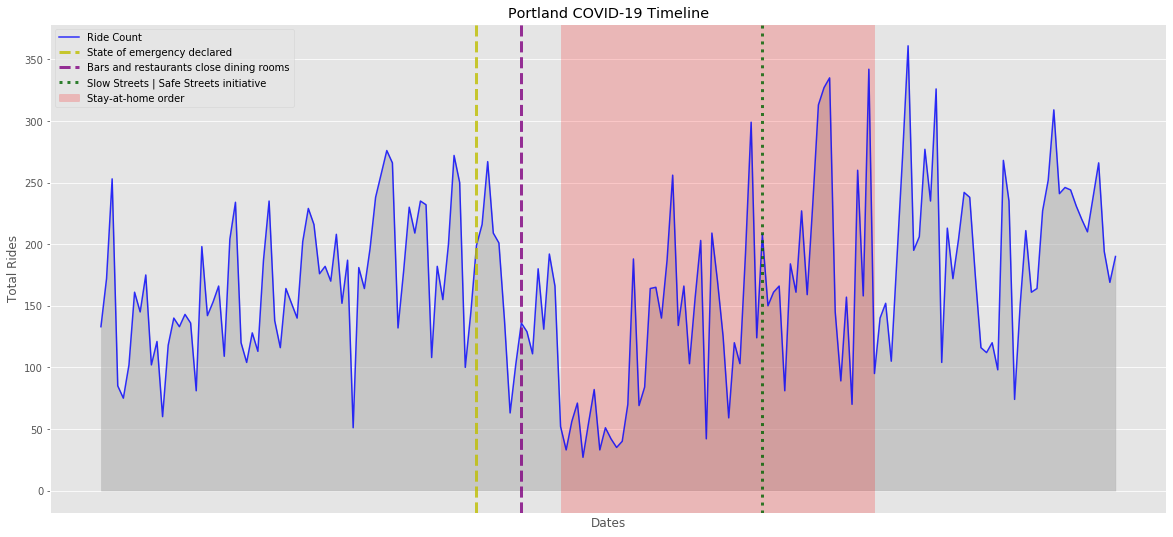

In [26]:
fig, ax1 = plt.subplots(figsize=(20,9)) # setting size of graph area

plt.style.use('ggplot')


# area graph to show number cases
ax1.fill_between(portland_covid['ride_date'], portland_covid['ride_count'], color="darkgray", alpha=0.5)

# line to highlight area graph
ax1.plot(portland_covid['ride_date'], portland_covid['ride_count'], color="blue", alpha=0.8, label = 'Ride Count') 

# COVID-19 Happenings
ax1.axvspan('2020-03-23', '2020-05-18', alpha=0.2, color='red', label= 'Stay-at-home order')
# ax1.axvline(x = '2020-03-16', lw = 3, color = 'red', ls = '--', alpha = 0.8,label= '')
ax1.axvline(x = '2020-03-08', lw = 3, color = 'y', ls = '--', alpha = 0.8,label= 'State of emergency declared')
ax1.axvline(x = '2020-03-16', lw = 3, color = 'purple', ls = '--', alpha = 0.8,label= 'Bars and restaurants close dining rooms')
ax1.axvline(x = '2020-04-28', lw = 3, color = 'darkgreen', ls = ':', alpha = 0.8,label= 'Slow Streets | Safe Streets initiative')
# ax1.axvline(x = '2020-10-01', lw = 3, color = 'tab:olive', ls = '--', alpha = 0.8,label= '')
# ax1.axvline(x = '2021-04-15', lw = 3, color = 'tab:orange', ls = 'dashdot', alpha = 0.8,label= 'Vaccinations available to ages 16+')


# formatting x axis date to show month and year
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b - %y'))

# Add titles
plt.title("Portland COVID-19 Timeline")
ax1.set_xlabel("Dates")
ax1.set_ylabel('Total Rides')
ax1.legend()

plt.savefig('../images/portland_covid_timeline.png');

Washington DC

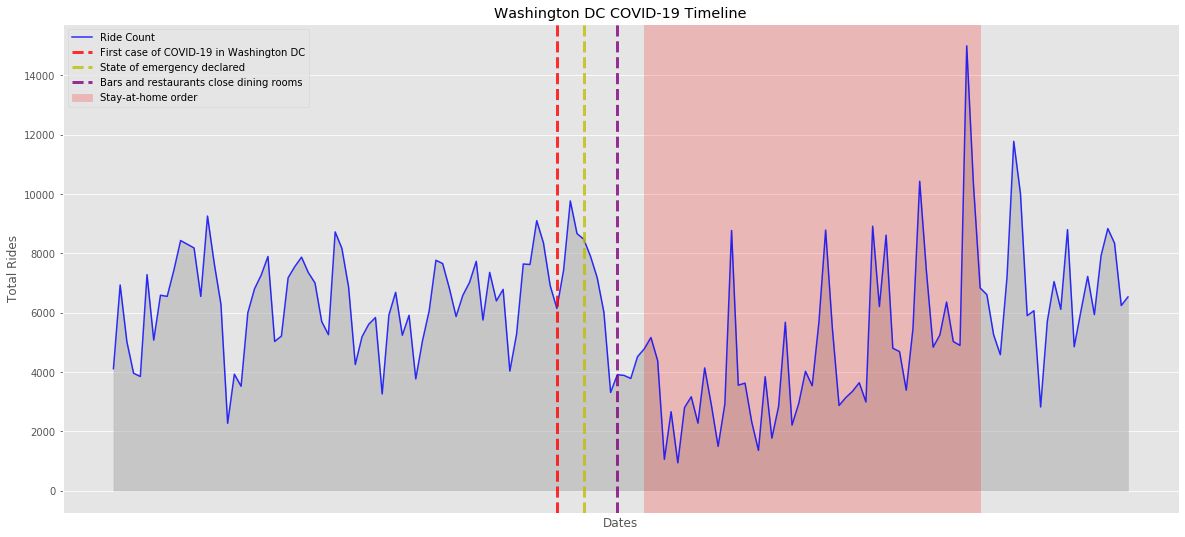

In [27]:
fig, ax1 = plt.subplots(figsize=(20,9)) # setting size of graph area

plt.style.use('ggplot')


# area graph to show number cases
ax1.fill_between(dc_covid['ride_date'], dc_covid['ride_count'], color="darkgray", alpha=0.5)

# line to highlight area graph
ax1.plot(dc_covid['ride_date'], dc_covid['ride_count'], color="blue", alpha=0.8, label = 'Ride Count') 


# COVID-19 Happenings
ax1.axvspan('2020-03-20', '2020-06-08', alpha=0.2, color='red', label= 'Stay-at-home order')
ax1.axvline(x = '2020-03-07', lw = 3, color = 'red', ls = '--', alpha = 0.8,label= 'First case of COVID-19 in Washington DC')
ax1.axvline(x = '2020-03-11', lw = 3, color = 'y', ls = '--', alpha = 0.8,label= 'State of emergency declared')
ax1.axvline(x = '2020-03-16', lw = 3, color = 'purple', ls = '--', alpha = 0.8,label= 'Bars and restaurants close dining rooms')
# ax1.axvline(x = '2020-04-28', lw = 3, color = 'darkgreen', ls = ':', alpha = 0.8,label= '')
# ax1.axvline(x = '2020-10-01', lw = 3, color = 'tab:olive', ls = '--', alpha = 0.8,label= '')
# ax1.axvline(x = '2021-04-15', lw = 3, color = 'tab:orange', ls = 'dashdot', alpha = 0.8,label= 'Vaccinations available to ages 16+')


# formatting x axis date to show month and year
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b - %y'))

# Add titles
plt.title("Washington DC COVID-19 Timeline")
ax1.set_xlabel("Dates")
ax1.set_ylabel('Total Rides')
ax1.legend()

plt.savefig('../images/dc_covid_timeline.png');

Minneapolis

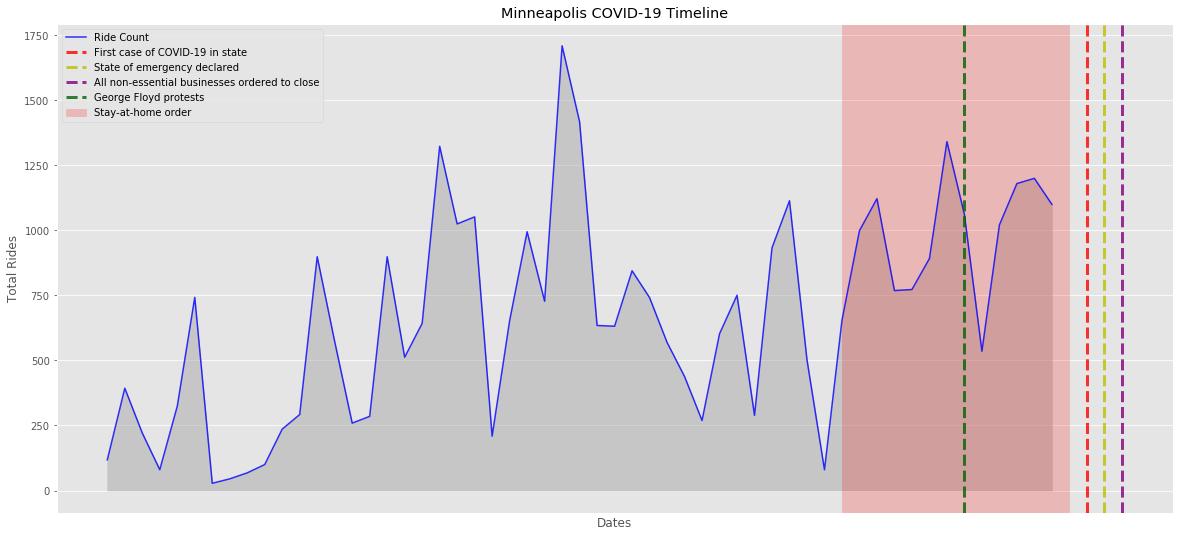

In [28]:
fig, ax1 = plt.subplots(figsize=(20,9)) # setting size of graph area

plt.style.use('ggplot')


# area graph to show number cases
ax1.fill_between(minneapolis_covid['ride_date'], minneapolis_covid['ride_count'], color="darkgray", alpha=0.5)

# line to highlight area graph
ax1.plot(minneapolis_covid['ride_date'], minneapolis_covid['ride_count'], color="blue", alpha=0.8, label = 'Ride Count') 


# COVID-19 Happenings
ax1.axvspan('2020-03-25', '2020-05-18', alpha=0.2, color='red', label= 'Stay-at-home order')
ax1.axvline(x = '2020-03-01', lw = 3, color = 'red', ls = '--', alpha = 0.8,label= 'First case of COVID-19 in state')
ax1.axvline(x = '2020-03-13', lw = 3, color = 'y', ls = '--', alpha = 0.8,label= 'State of emergency declared')
ax1.axvline(x = '2020-03-16', lw = 3, color = 'purple', ls = '--', alpha = 0.8,label= 'All non-essential businesses ordered to close')
# ax1.axvline(x = '2020-04-28', lw = 3, color = 'darkgreen', ls = ':', alpha = 0.8,label= '')
ax1.axvline(x = '2020-05-25', lw = 3, color = 'darkgreen', ls = '--', alpha = 0.8,label= 'George Floyd protests')
# ax1.axvline(x = '2021-04-15', lw = 3, color = 'tab:orange', ls = 'dashdot', alpha = 0.8,label= 'Vaccinations available to ages 16+')


# formatting x axis date to show month and year
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b - %y'))

# Add titles
plt.title("Minneapolis COVID-19 Timeline")
ax1.set_xlabel("Dates")
ax1.set_ylabel('Total Rides')
ax1.legend()

plt.savefig('../images/minneapolis_covid_timeline.png');

Boston

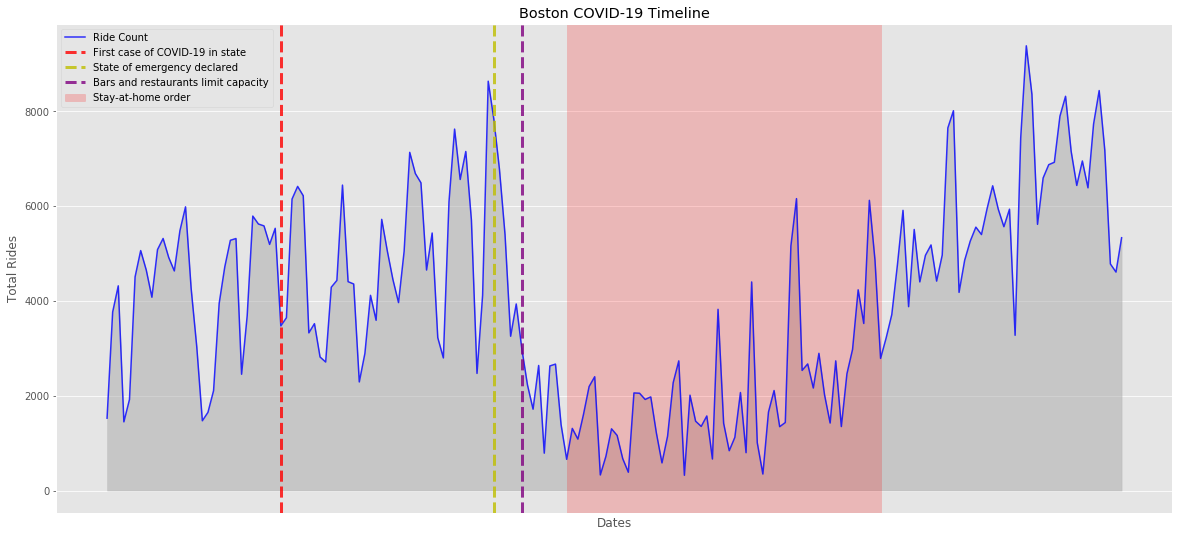

In [29]:
fig, ax1 = plt.subplots(figsize=(20,9)) # setting size of graph area

plt.style.use('ggplot')


# area graph to show number cases
ax1.fill_between(boston_covid['ride_date'], boston_covid['ride_count'], color="darkgray", alpha=0.5)

# line to highlight area graph
ax1.plot(boston_covid['ride_date'], boston_covid['ride_count'], color="blue", alpha=0.8, label = 'Ride Count') 


# COVID-19 Happenings
ax1.axvspan('2020-03-23', '2020-05-18', alpha=0.2, color='red', label= 'Stay-at-home order')
ax1.axvline(x = '2020-02-01', lw = 3, color = 'red', ls = '--', alpha = 0.8,label= 'First case of COVID-19 in state')
ax1.axvline(x = '2020-03-10', lw = 3, color = 'y', ls = '--', alpha = 0.8,label= 'State of emergency declared')
ax1.axvline(x = '2020-03-15', lw = 3, color = 'purple', ls = '--', alpha = 0.8,label= 'Bars and restaurants limit capacity')
# ax1.axvline(x = '2020-04-28', lw = 3, color = 'darkgreen', ls = ':', alpha = 0.8,label= '')
# ax1.axvline(x = '2020-05-25', lw = 3, color = 'darkgreen', ls = '--', alpha = 0.8,label= 'George Floyd protests')
# ax1.axvline(x = '2021-04-15', lw = 3, color = 'tab:orange', ls = 'dashdot', alpha = 0.8,label= 'Vaccinations available to ages 16+')


# formatting x axis date to show month and year
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b - %y'))

# Add titles
plt.title("Boston COVID-19 Timeline")
ax1.set_xlabel("Dates")
ax1.set_ylabel('Total Rides')
ax1.legend()

plt.savefig('../images/boston_covid_timeline.png');

Los Angeles

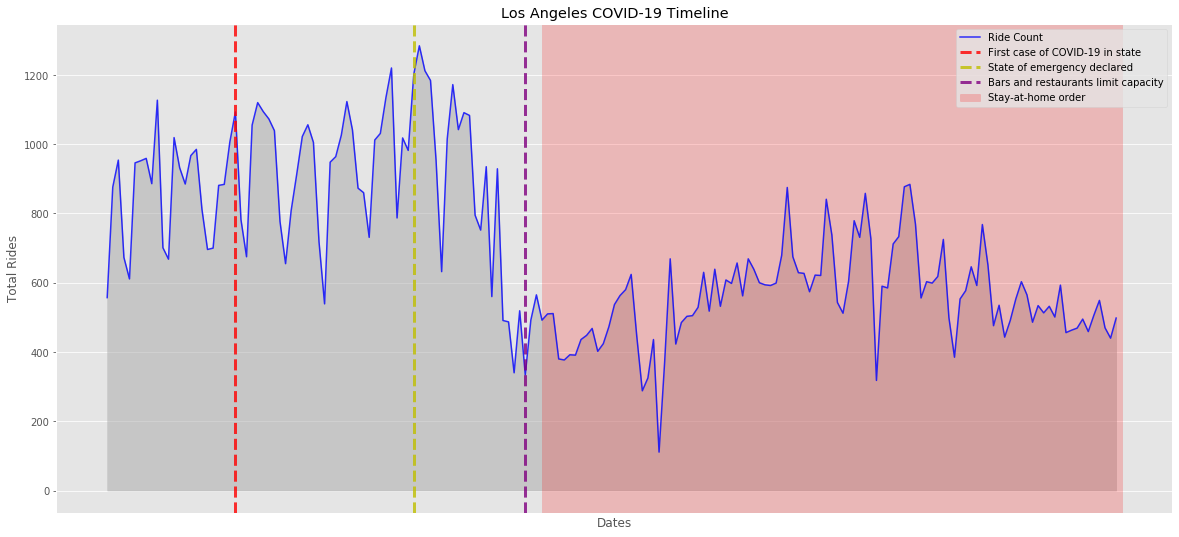

In [30]:
fig, ax1 = plt.subplots(figsize=(20,9)) # setting size of graph area

plt.style.use('ggplot')


# area graph to show number cases
ax1.fill_between(la_covid['ride_date'], la_covid['ride_count'], color="darkgray", alpha=0.5)

# line to highlight area graph
ax1.plot(la_covid['ride_date'], la_covid['ride_count'], color="blue", alpha=0.8, label = 'Ride Count') 


# COVID-19 Happenings
ax1.axvspan('2020-03-19', '2021-01-25', alpha=0.2, color='red', label= 'Stay-at-home order')
ax1.axvline(x = '2020-01-24', lw = 3, color = 'red', ls = '--', alpha = 0.8,label= 'First case of COVID-19 in state')
ax1.axvline(x = '2020-02-25', lw = 3, color = 'y', ls = '--', alpha = 0.8,label= 'State of emergency declared')
ax1.axvline(x = '2020-03-16', lw = 3, color = 'purple', ls = '--', alpha = 0.8,label= 'Bars and restaurants limit capacity')
# ax1.axvline(x = '2020-04-28', lw = 3, color = 'darkgreen', ls = ':', alpha = 0.8,label= '')
# ax1.axvline(x = '2020-05-25', lw = 3, color = 'darkgreen', ls = '--', alpha = 0.8,label= 'George Floyd protests')
# ax1.axvline(x = '2021-04-15', lw = 3, color = 'tab:orange', ls = 'dashdot', alpha = 0.8,label= 'Vaccinations available to ages 16+')


# formatting x axis date to show month and year
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b - %y'))

# Add titles
plt.title("Los Angeles COVID-19 Timeline")
ax1.set_xlabel("Dates")
ax1.set_ylabel('Total Rides')
ax1.legend()

plt.savefig('../images/la_covid_timeline.png');

New York

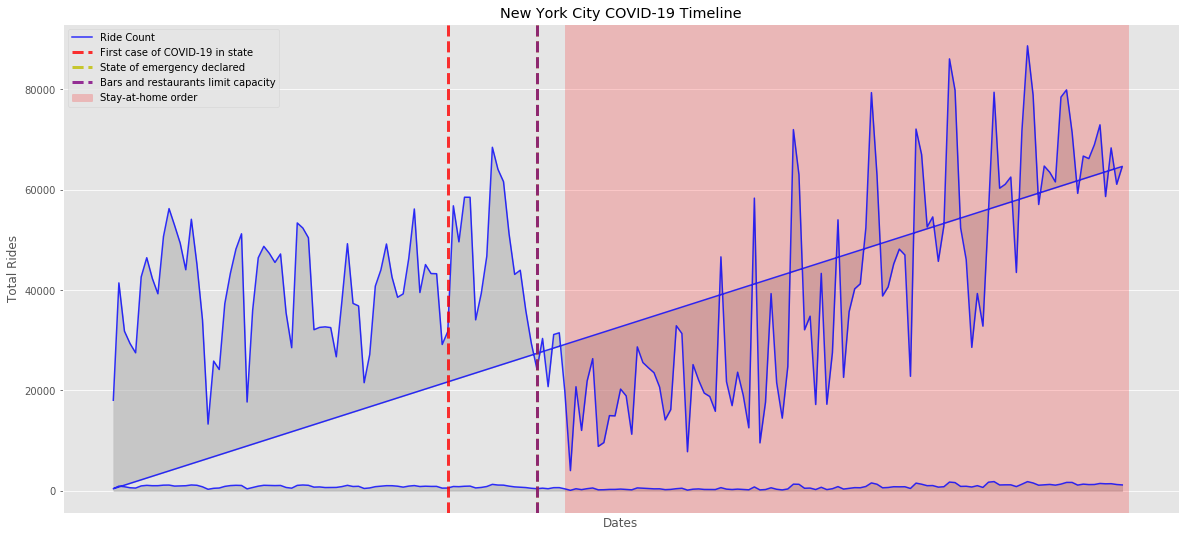

In [31]:
fig, ax1 = plt.subplots(figsize=(20,9)) # setting size of graph area

plt.style.use('ggplot')


# area graph to show number cases
ax1.fill_between(nyc_covid['ride_date'], nyc_covid['ride_count'], color="darkgray", alpha=0.5)

# line to highlight area graph
ax1.plot(nyc_covid['ride_date'], nyc_covid['ride_count'], color="blue", alpha=0.8, label = 'Ride Count') 


# COVID-19 Happenings
ax1.axvspan('2020-03-22', '2021-05-15', alpha=0.2, color='red', label= 'Stay-at-home order')
ax1.axvline(x = '2020-03-01', lw = 3, color = 'red', ls = '--', alpha = 0.8,label= 'First case of COVID-19 in state')
ax1.axvline(x = '2020-03-17', lw = 3, color = 'y', ls = '--', alpha = 0.8,label= 'State of emergency declared')
ax1.axvline(x = '2020-03-17', lw = 3, color = 'purple', ls = '--', alpha = 0.8,label= 'Bars and restaurants limit capacity')
# ax1.axvline(x = '2020-04-28', lw = 3, color = 'darkgreen', ls = ':', alpha = 0.8,label= '')
# ax1.axvline(x = '2020-05-25', lw = 3, color = 'darkgreen', ls = '--', alpha = 0.8,label= 'George Floyd protests')
# ax1.axvline(x = '2021-04-15', lw = 3, color = 'tab:orange', ls = 'dashdot', alpha = 0.8,label= 'Vaccinations available to ages 16+')


# formatting x axis date to show month and year
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b - %y'))

# Add titles
plt.title("New York City COVID-19 Timeline")
ax1.set_xlabel("Dates")
ax1.set_ylabel('Total Rides')
ax1.legend()

plt.savefig('../images/ny_covid_timeline.png');

San Francisco

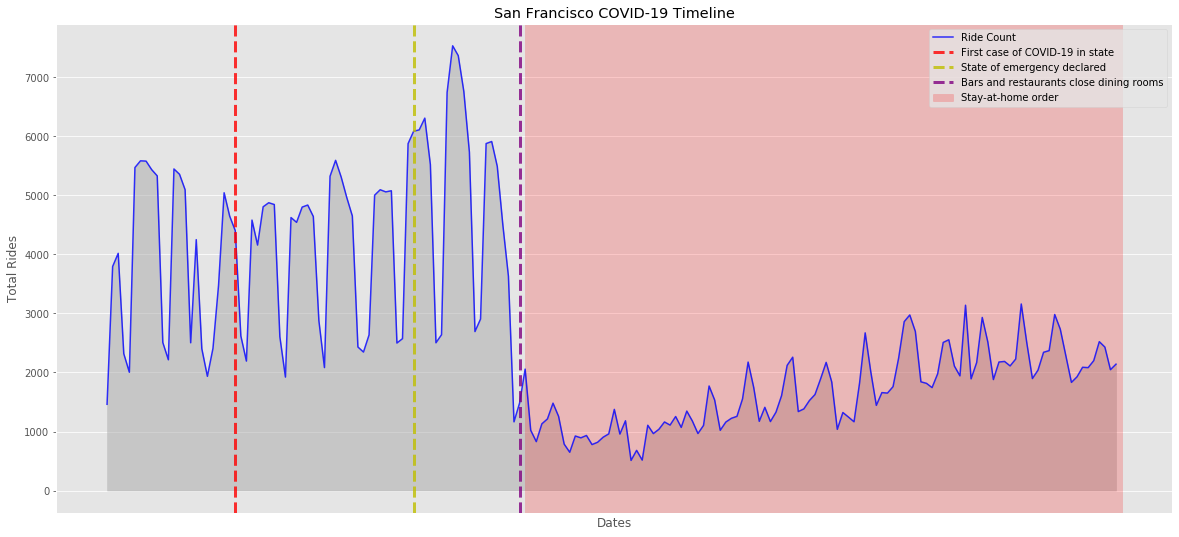

In [32]:
fig, ax1 = plt.subplots(figsize=(20,9)) # setting size of graph area

plt.style.use('ggplot')


# area graph to show number cases
ax1.fill_between(sf_covid['ride_date'], sf_covid['ride_count'], color="darkgray", alpha=0.5)

# line to highlight area graph
ax1.plot(sf_covid['ride_date'], sf_covid['ride_count'], color="blue", alpha=0.8, label = 'Ride Count') 


# COVID-19 Happenings
ax1.axvspan('2020-03-16', '2021-01-25', alpha=0.2, color='red', label= 'Stay-at-home order')
ax1.axvline(x = '2020-01-24', lw = 3, color = 'red', ls = '--', alpha = 0.8,label= 'First case of COVID-19 in state')
ax1.axvline(x = '2020-02-25', lw = 3, color = 'y', ls = '--', alpha = 0.8,label= 'State of emergency declared')
ax1.axvline(x = '2020-03-15', lw = 3, color = 'purple', ls = '--', alpha = 0.8,label= 'Bars and restaurants close dining rooms')
# ax1.axvline(x = '2020-04-28', lw = 3, color = 'darkgreen', ls = ':', alpha = 0.8,label= '')
# ax1.axvline(x = '2020-10-01', lw = 3, color = 'tab:olive', ls = '--', alpha = 0.8,label= '')
# ax1.axvline(x = '2021-04-15', lw = 3, color = 'tab:orange', ls = 'dashdot', alpha = 0.8,label= 'Vaccinations available to ages 16+')


# formatting x axis date to show month and year
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b - %y'))

# Add titles
plt.title("San Francisco COVID-19 Timeline")
ax1.set_xlabel("Dates")
ax1.set_ylabel('Total Rides')
ax1.legend()

plt.savefig('../images/sf_covid_timeline.png');